<a href="https://colab.research.google.com/github/Anmol9835255787/Google-Solution-Challenge-24/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/heart.csv')

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


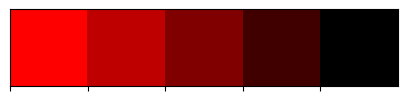

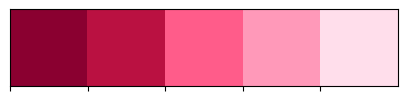

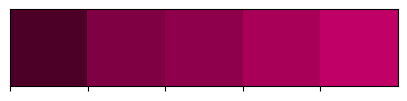

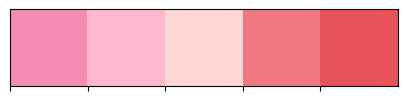

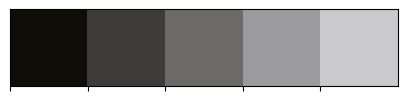

In [7]:

red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [8]:
numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
object_cols = [cname for cname in df.columns if df[cname].dtype == "object"]

In [9]:
    df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
175,43,M,ASY,140,288,0,Normal,135,Y,2.0,Flat,1
885,53,F,NAP,128,216,0,LVH,115,N,0.0,Up,0
522,50,M,ASY,144,349,0,LVH,120,Y,1.0,Up,1
456,61,M,NAP,120,0,0,Normal,80,Y,0.0,Flat,1
692,39,F,NAP,94,199,0,Normal,179,N,0.0,Up,0


<ipython-input-10-b7a89b684526>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap = 'RdBu',annot=True)


<Axes: >

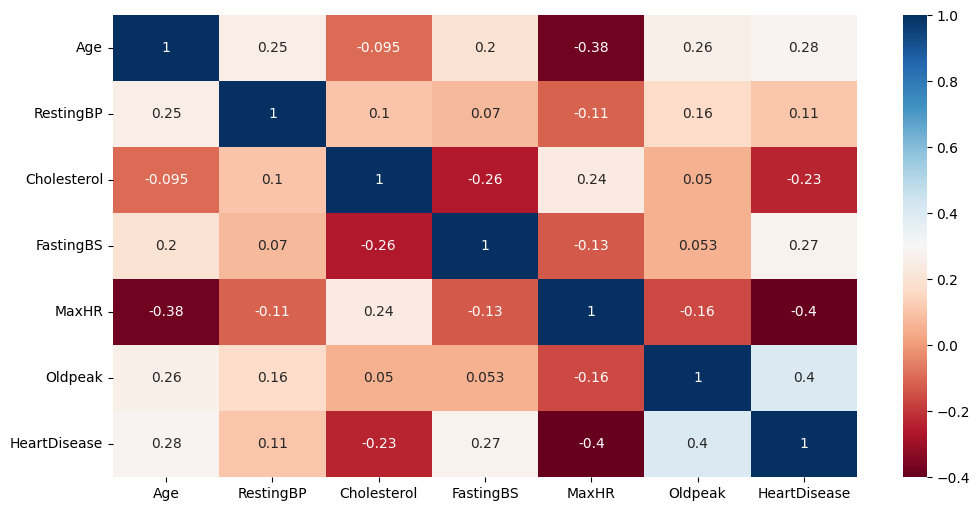

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap = 'RdBu',annot=True)

<ipython-input-11-d87e64cec565>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corrwith(df['HeartDisease']).sort_values(ascending = False).to_frame()


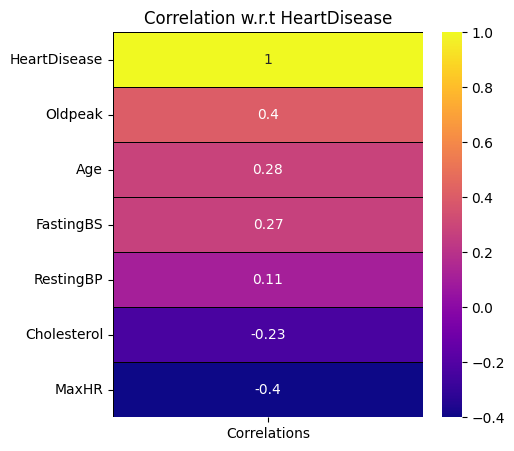

In [11]:
corr = df.corrwith(df['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'plasma',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


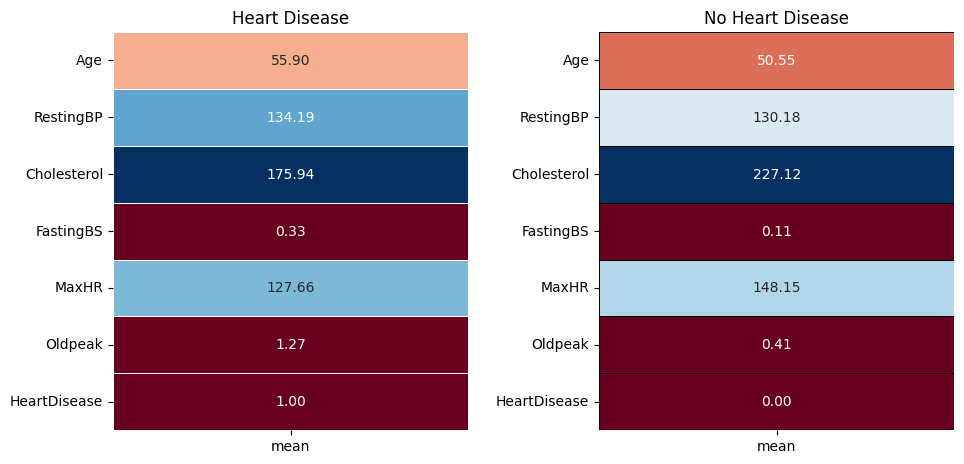

In [13]:
yes = df[df['HeartDisease'] == 1].describe().T
ye = df[df['HeartDisease'] == 1]
no = df[df['HeartDisease'] == 0].describe().T
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = 'RdBu',linewidths = 0.4,linecolor = 'white',cbar = False,fmt = '.2f')
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = 'RdBu',linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

<ipython-input-14-a85f1d9b4d42>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'HeartDisease',data = df,palette = colors)
<ipython-input-14-a85f1d9b4d42>:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x = 'HeartDisease',data = df,palette = colors)


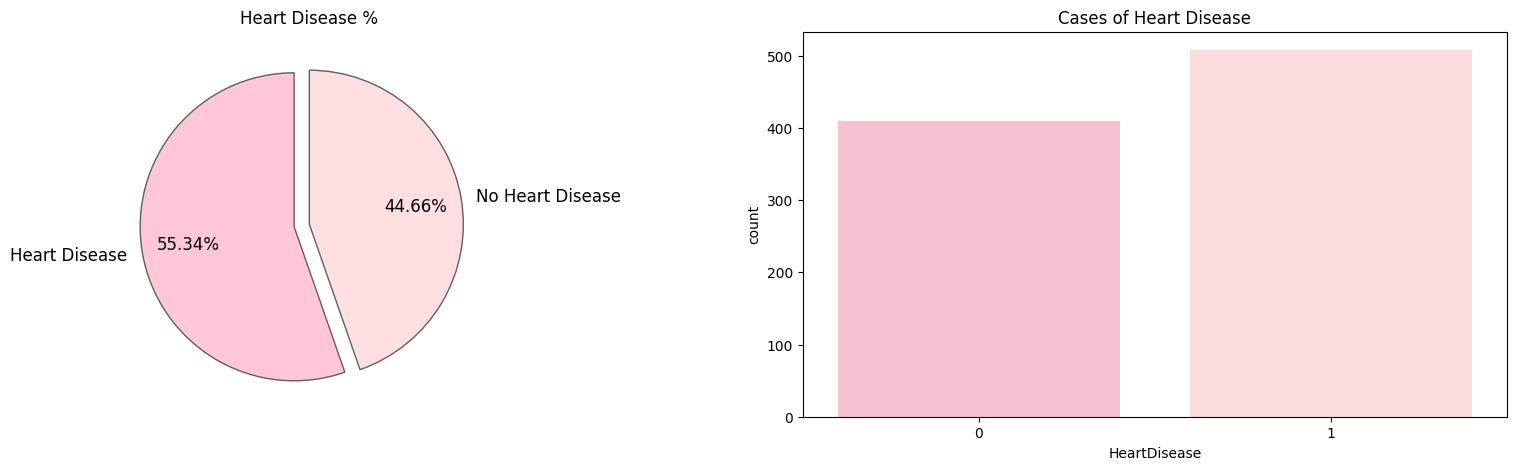

In [14]:
data = df.copy()
#colors = ['#F3ED13','#451FA4']
colors=color_mix[1:4]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(df['HeartDisease'].value_counts(),labels =['Heart Disease','No Heart Disease'] ,startangle = 90,explode = (0.1,0), colors=colors, pctdistance=0.7,autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),textprops={'fontsize':12})

#plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors)
plt.title('Heart Disease %');

plt.subplot(1,2,2)
sns.countplot(x = 'HeartDisease',data = df,palette = colors)
plt.title('Cases of Heart Disease');
plt.show()

<ipython-input-15-d1d3320b60c6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette=colors,edgecolor=black_grad[2], alpha=0.85)
<ipython-input-15-d1d3320b60c6>:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='Sex', data=df, palette=colors,edgecolor=black_grad[2], alpha=0.85)


<Axes: xlabel='Sex', ylabel='count'>

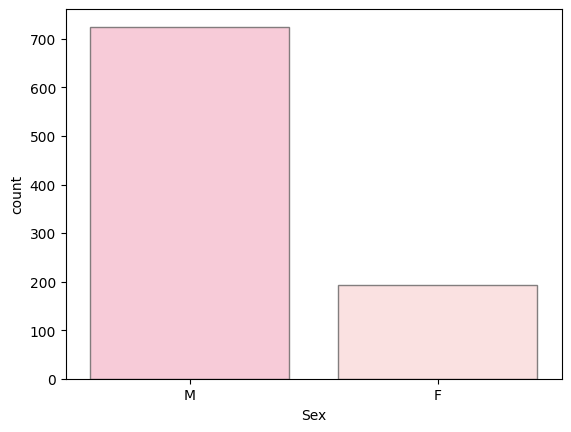

In [15]:
sns.countplot(x='Sex', data=df, palette=colors,edgecolor=black_grad[2], alpha=0.85)

<ipython-input-16-cef9a507fcda>:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x='Sex', data=df, palette=colors,edgecolor=black_grad[2], alpha=0.85, hue='HeartDisease')


<function matplotlib.pyplot.show(close=None, block=None)>

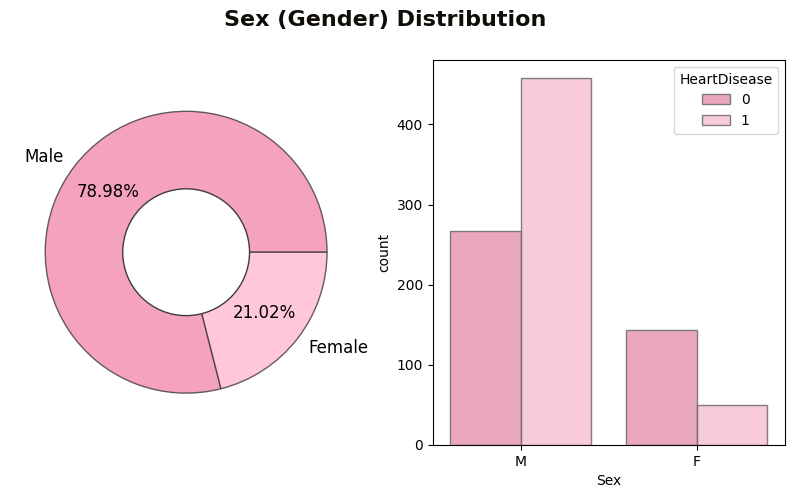

In [16]:
colors=color_mix[0:4]
#colors=black_grad[2:4]

plt.figure(figsize=(10, 5))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy',fontsize='16', fontfamily='sans-serif', color=black_grad[0])
plt.subplot(1, 2, 1)
plt.pie(df['Sex'].value_counts(), labels=['Male', 'Female'], colors=colors, pctdistance=0.7,autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

'''plt.subplot(1, 2, 2)
sns.countplot(x='Sex', data=df, palette=colors, order=order,edgecolor=black_grad[2], alpha=0.85)'''

plt.subplot(1, 2, 2)

sns.countplot(x='Sex', data=df, palette=colors,edgecolor=black_grad[2], alpha=0.85, hue='HeartDisease')
plt.show

<Axes: ylabel='Sex'>

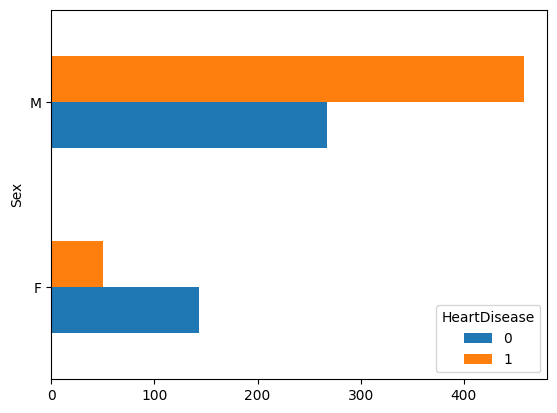

In [17]:
pd.crosstab(data.Sex, data.HeartDisease).plot(kind='barh')

<ipython-input-18-17d837b2deff>:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x='ChestPainType', data=df, palette=colors,edgecolor=black_grad[2], alpha=0.85, hue='HeartDisease')


<function matplotlib.pyplot.show(close=None, block=None)>

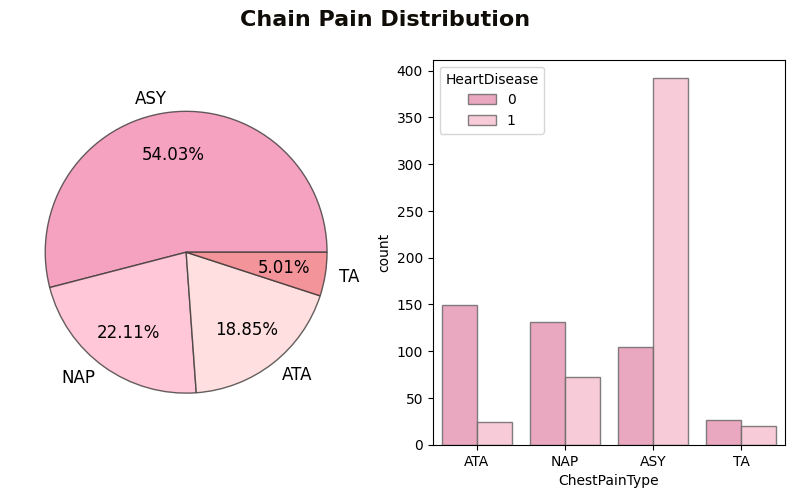

In [18]:

plt.figure(figsize=(10, 5))
plt.suptitle('Chain Pain Distribution', fontweight='heavy',fontsize='16', fontfamily='sans-serif', color=black_grad[0])
plt.subplot(1, 2, 2)

sns.countplot(x='ChestPainType', data=df, palette=colors,edgecolor=black_grad[2], alpha=0.85, hue='HeartDisease')
plt.subplot(1, 2, 1)
plt.pie(df['ChestPainType'].value_counts(), labels=['ASY', 'NAP','ATA','TA'], colors=colors, pctdistance=0.7,autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),textprops={'fontsize':12})
plt.show

In [19]:
print('\033[1m'+'.: Skewness & Kurtosis :.'+'\033[0m')
print('*' * 45)

for i in range(len(numeric_cols) - 1):
    title =  numeric_cols[i]
    # --- Skewness & Kurtosis ---
    print(title)
    print('Skewness:'+'\033[1m {:.3f}'.format(df[numeric_cols[i]].skew(axis = 0, skipna = True)))
    print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[numeric_cols[i]].kurt(axis = 0, skipna = True)))
   # print('\n')


.: Skewness & Kurtosis :.
*********************************************
Age
Skewness: -0.196
Kurtosis: -0.386
RestingBP
Skewness: 0.180
Kurtosis: 3.271
Cholesterol
Skewness: -0.610
Kurtosis: 0.118
FastingBS
Skewness: 1.264
Kurtosis: -0.402
MaxHR
Skewness: -0.144
Kurtosis: -0.448
Oldpeak
Skewness: 1.023
Kurtosis: 1.203


<ipython-input-20-ca6d4c793743>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)
<ipython-input-20-ca6d4c793743>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)
<ipython-input-20-ca6d4c793743>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)
<ipython-input-20-ca6d4c793743>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)


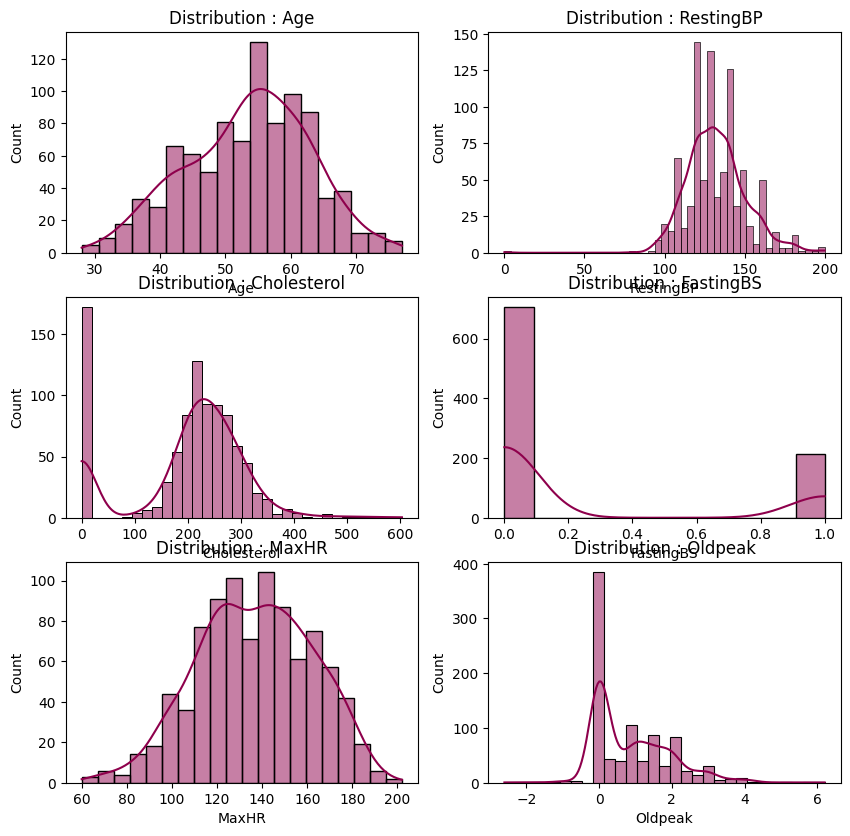

In [20]:
color = purple_grad[2]

fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numeric_cols) - 1):
    plt.subplot(3,2,i+1)
    #sns.histplot(df[numeric_cols[i]],palette = colors)
    sns.histplot(data=df, x=numeric_cols[i], kde=True, color=color)

    title = 'Distribution : ' + numeric_cols[i]
    plt.title(title)
    #print(' ' * 10)
plt.show()



<ipython-input-21-ff801441e74a>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)
<ipython-input-21-ff801441e74a>:6: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x = object_cols[i],data = df,hue = "HeartDisease",palette = colors)
<ipython-input-21-ff801441e74a>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)
<ipython-input-21-ff801441e74a>:6: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x = object_cols[i],data = df,hue = "HeartDisease",palette = colors)
<ipython-input-21-ff801441e74a>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated si

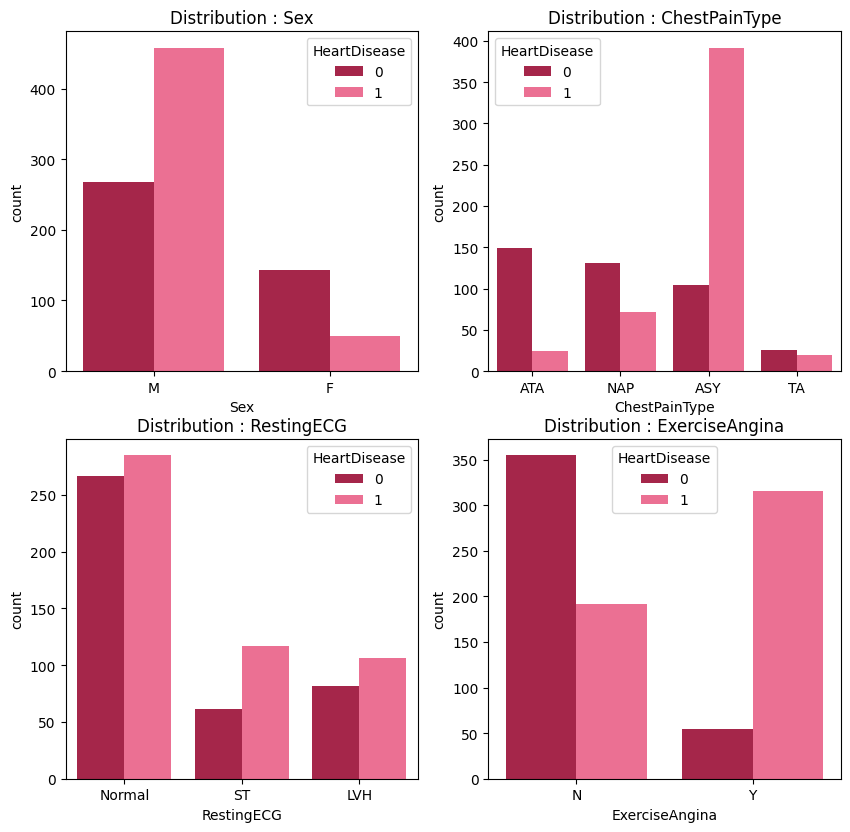

In [21]:
colors=pink_grad[1:4]

fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,15))
for i in range(len(object_cols) - 1):
    plt.subplot(3,2,i+1)
    sns.countplot(x = object_cols[i],data = df,hue = "HeartDisease",palette = colors)
    title = 'Distribution : ' + object_cols[i]
    plt.title(title);

In [22]:
object_cols


['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [23]:

sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

<ipython-input-24-86aa7ec0d031>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)
<ipython-input-24-86aa7ec0d031>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,2)
<ipython-input-24-86aa7ec0d031>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,3)
<ipython-input-24-86aa7ec0d031>:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,4)
<ipython-input-24-86aa7ec0d031>:26: MatplotlibDeprecationWarning: Auto-removal of ov

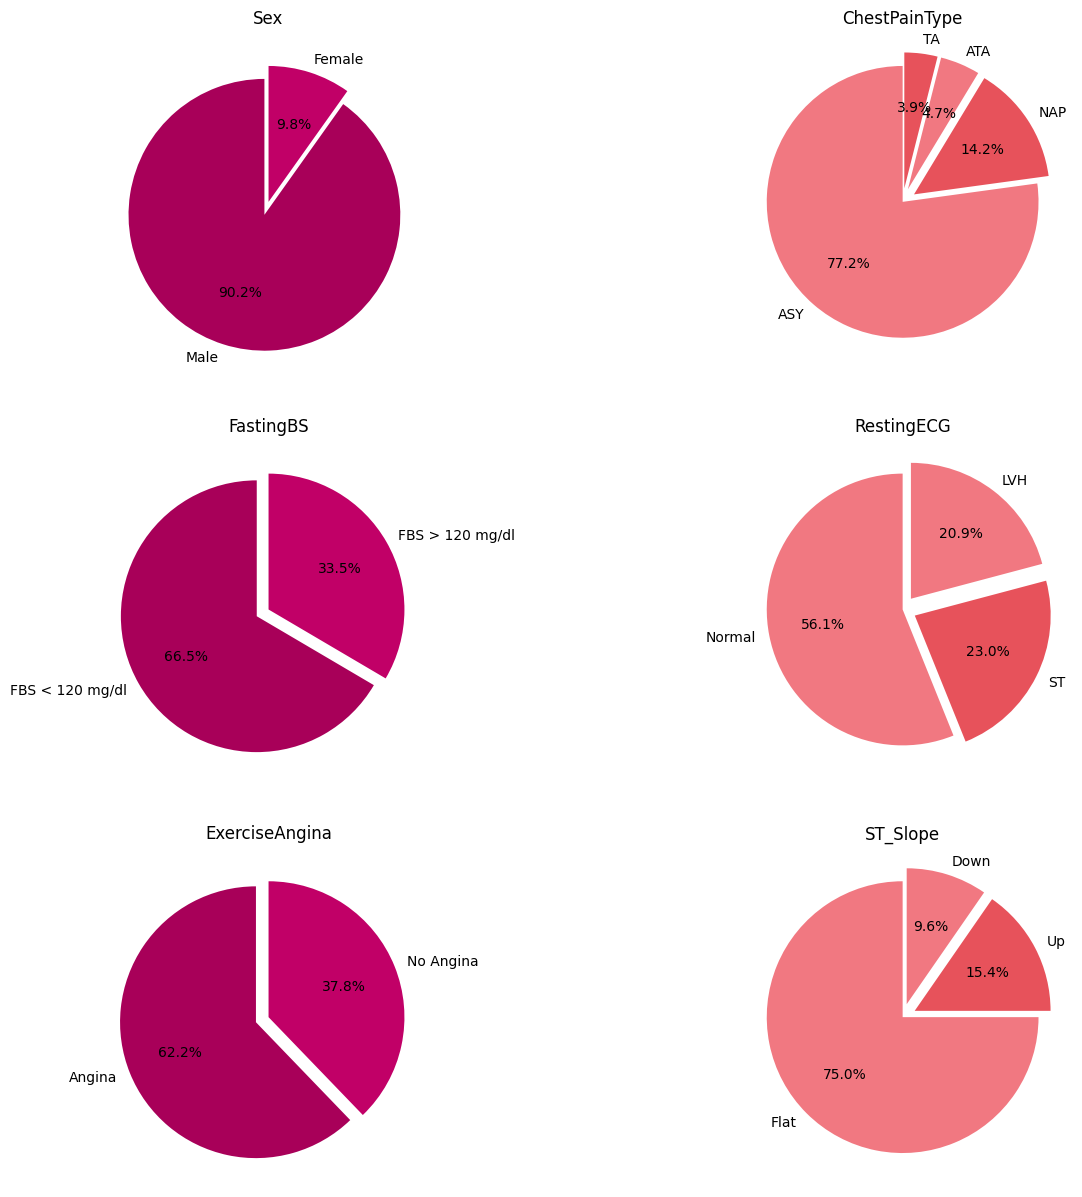

In [24]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))
#colors = ['#F3ED13','#451FA4']
colors=purple_grad[3:5]
#colors1=red_grad[0:4]
colors1=color_mix[3:5]




plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors)
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),colors = colors1)
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors)
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),colors = colors1)
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors)
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),colors = colors1)
plt.title('ST_Slope');

In [25]:
numeric_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [26]:
data['RestingBP_Group'] = [ int(i / 5) for i in data['RestingBP']]
data['Cholesterol_Group'] = [ int(i / 10) for i in data['Cholesterol']]
data['MaxHR_Group'] = [ int(i / 5) for i in data['MaxHR']]
data['Oldpeak_Group'] = [ int( (i*10) / 5) for i in data['Oldpeak']]
data['FastingBS_Group'] = [ int( (i*10) / 5) for i in data['FastingBS']]

<ipython-input-27-7a9c0e50aa29>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,1,i+1)
<ipython-input-27-7a9c0e50aa29>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,1,i+1)
<ipython-input-27-7a9c0e50aa29>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,1,i+1)
<ipython-input-27-7a9c0e50aa29>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,1,i+1)


ValueError: Could not interpret value `HeartDisease_Group` for `x`. An entry with this name does not appear in `data`.

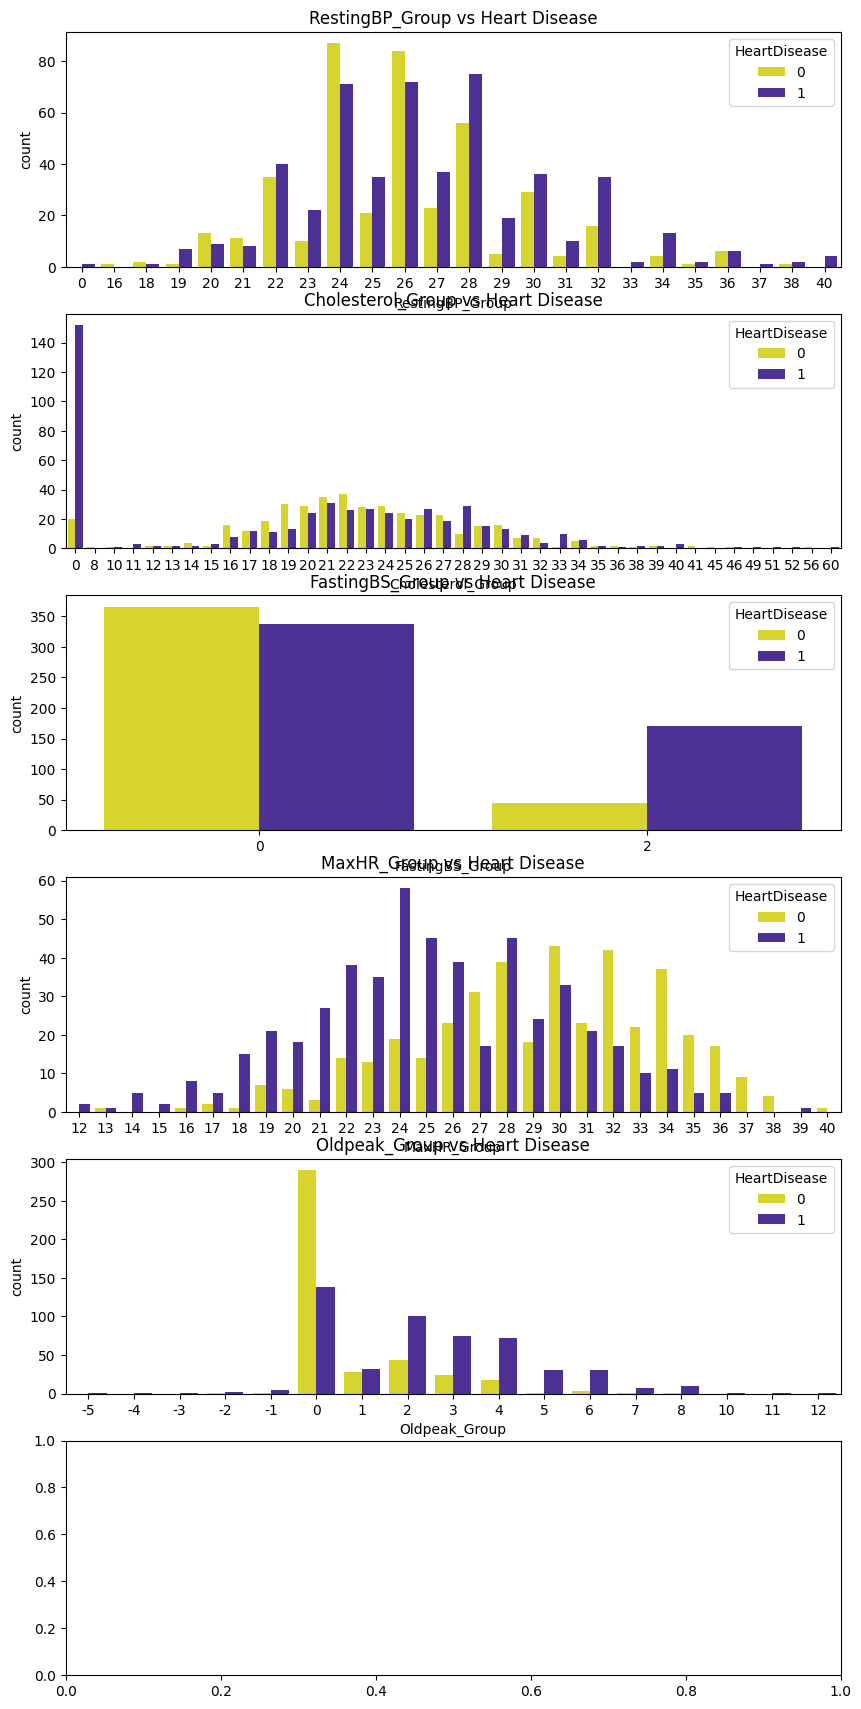

In [27]:
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (10,25))
colors = ['#F3ED13','#451FA4']
group_numerical_features = [i + '_Group' for i in numeric_cols[1:]]
for i in range(len(group_numerical_features)):
    plt.subplot(7,1,i+1)
    sns.countplot(x = group_numerical_features[i],data = data,hue = "HeartDisease",palette = colors)
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title);

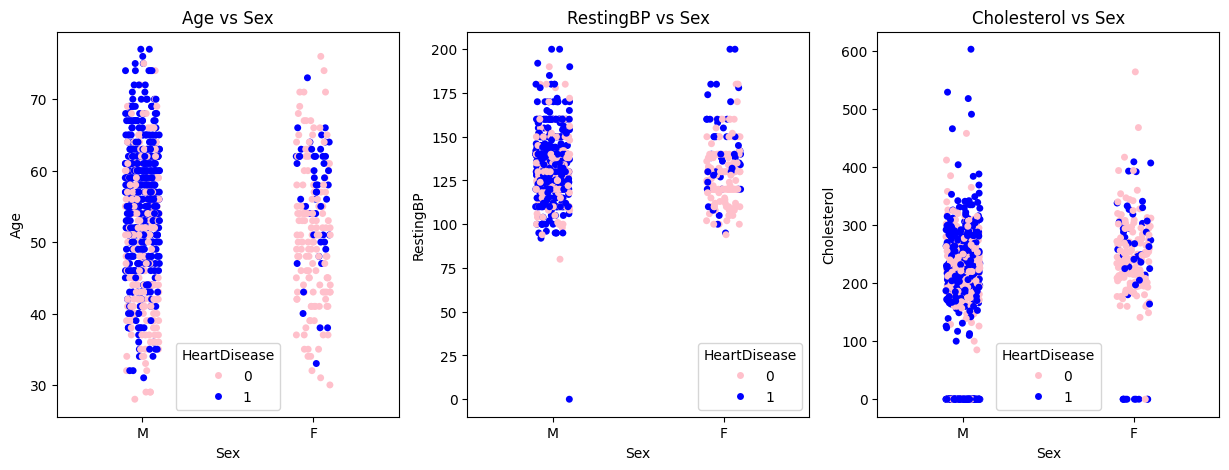

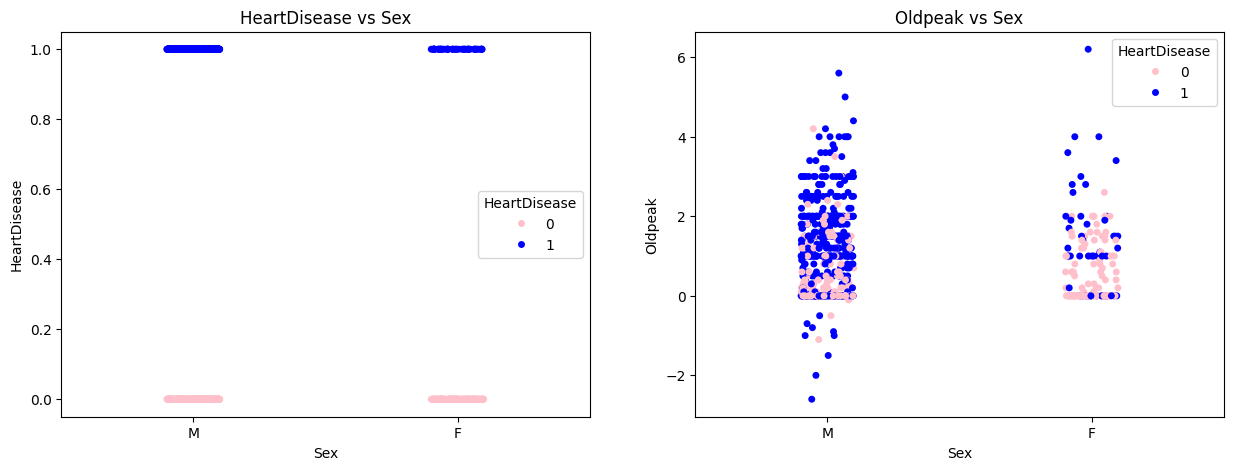

In [28]:
#colors = ['#F3ED13','#451FA4']
colors = ['pink','blue']
#colors = color_mix[0]
#colors=purple_grad[0:5]



fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs Sex'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs Sex'
    plt.title(title);

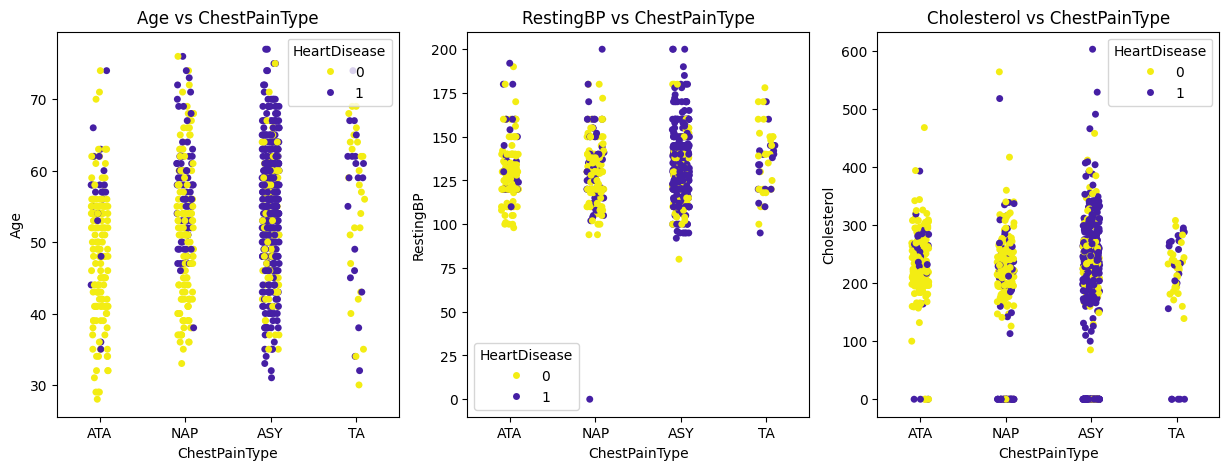

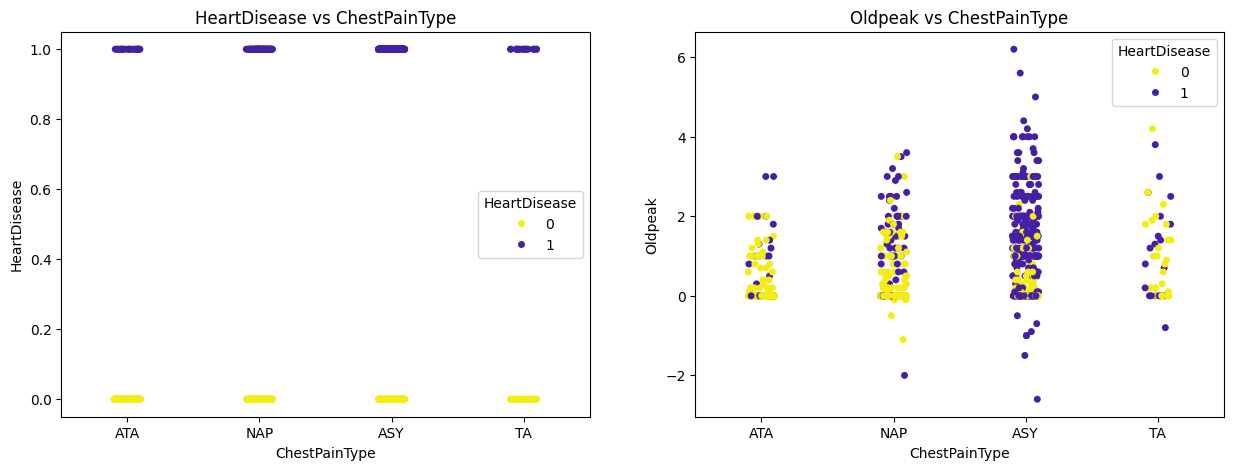

In [29]:
colors = ['#F3ED13','#451FA4']
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs ChestPainType'
    plt.title(title);

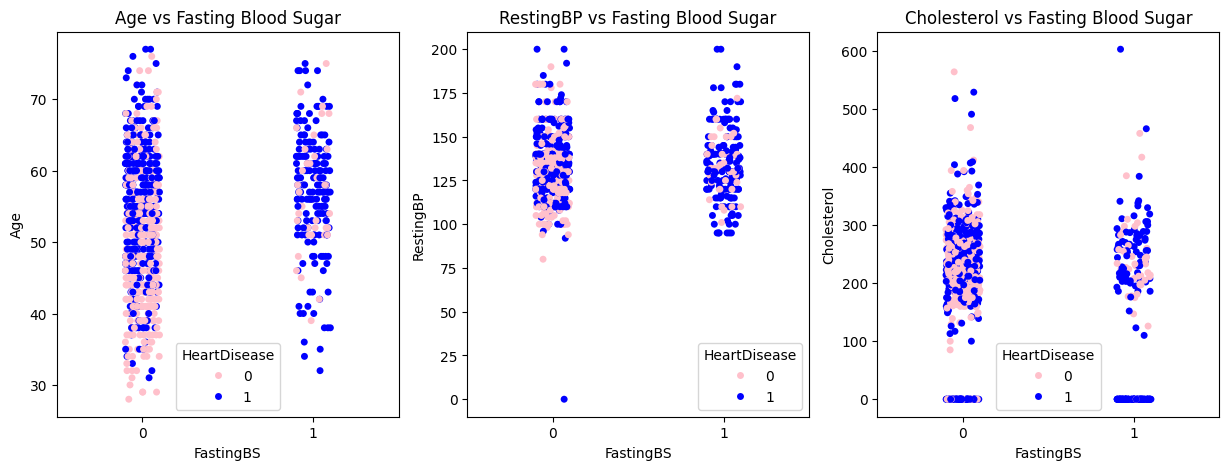

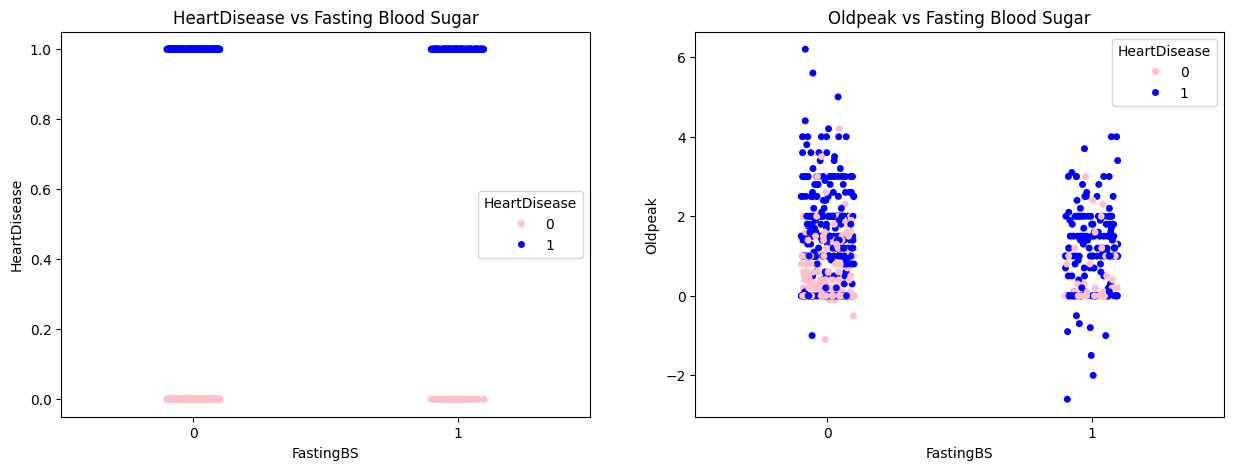

In [30]:
colors = ['pink','blue']

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'FastingBS',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs Fasting Blood Sugar'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'FastingBS',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs Fasting Blood Sugar'
    plt.title(title);

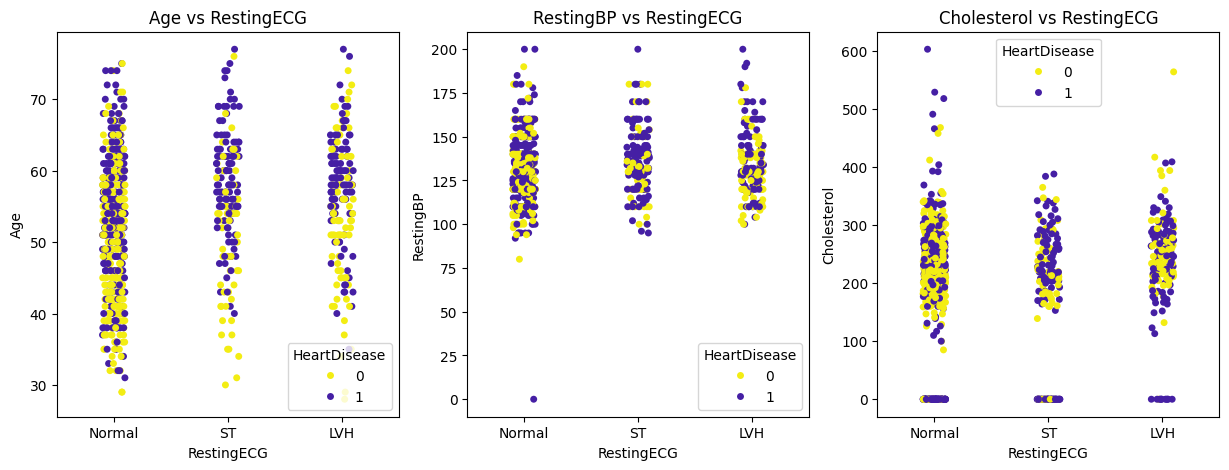

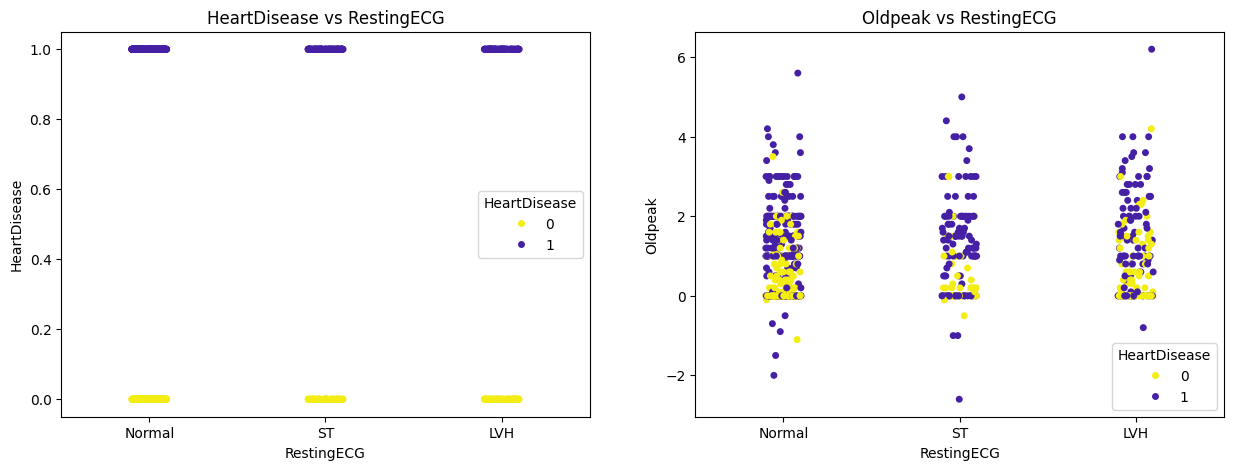

In [31]:
colors = ['#F3ED13','#451FA4']
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'RestingECG',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs RestingECG'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'RestingECG',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs RestingECG'
    plt.title(title);

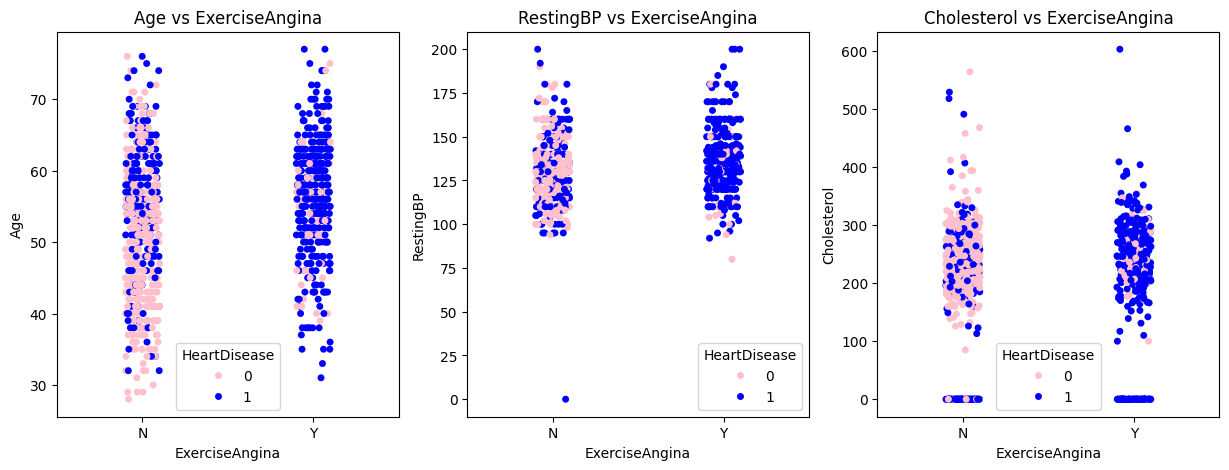

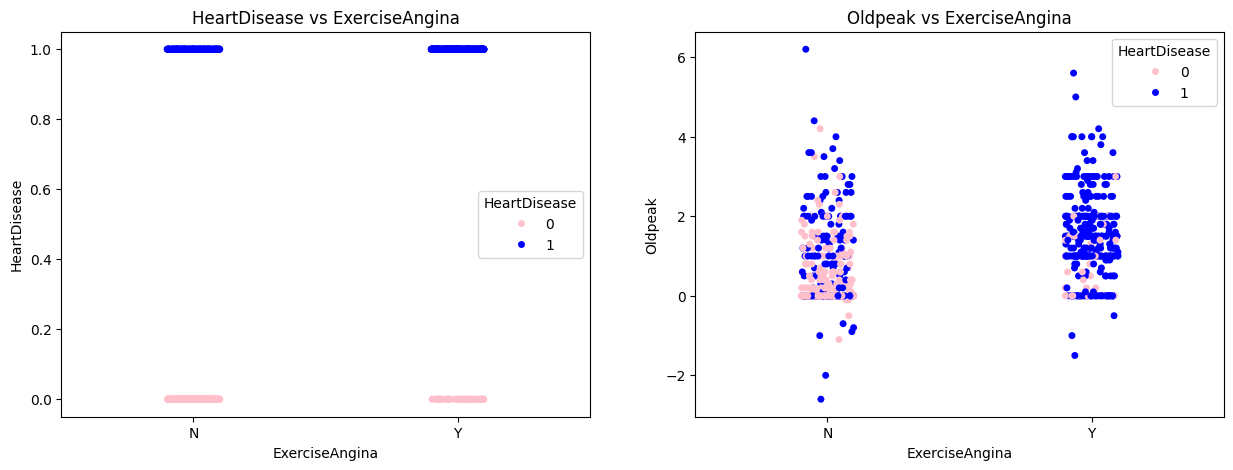

In [32]:
colors = ['pink','blue']

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs ExerciseAngina'
    plt.title(title);

In [ ]:
colors = ['#F3ED13','#451FA4']
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs ST_Slope'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs ST_Slope'
    plt.title(title);

In [34]:
### Numerical features vs Numerical features w.r.t Target variable(HeartDisease) :

ValueError: num must be an integer with 1 <= num <= 10, not 11

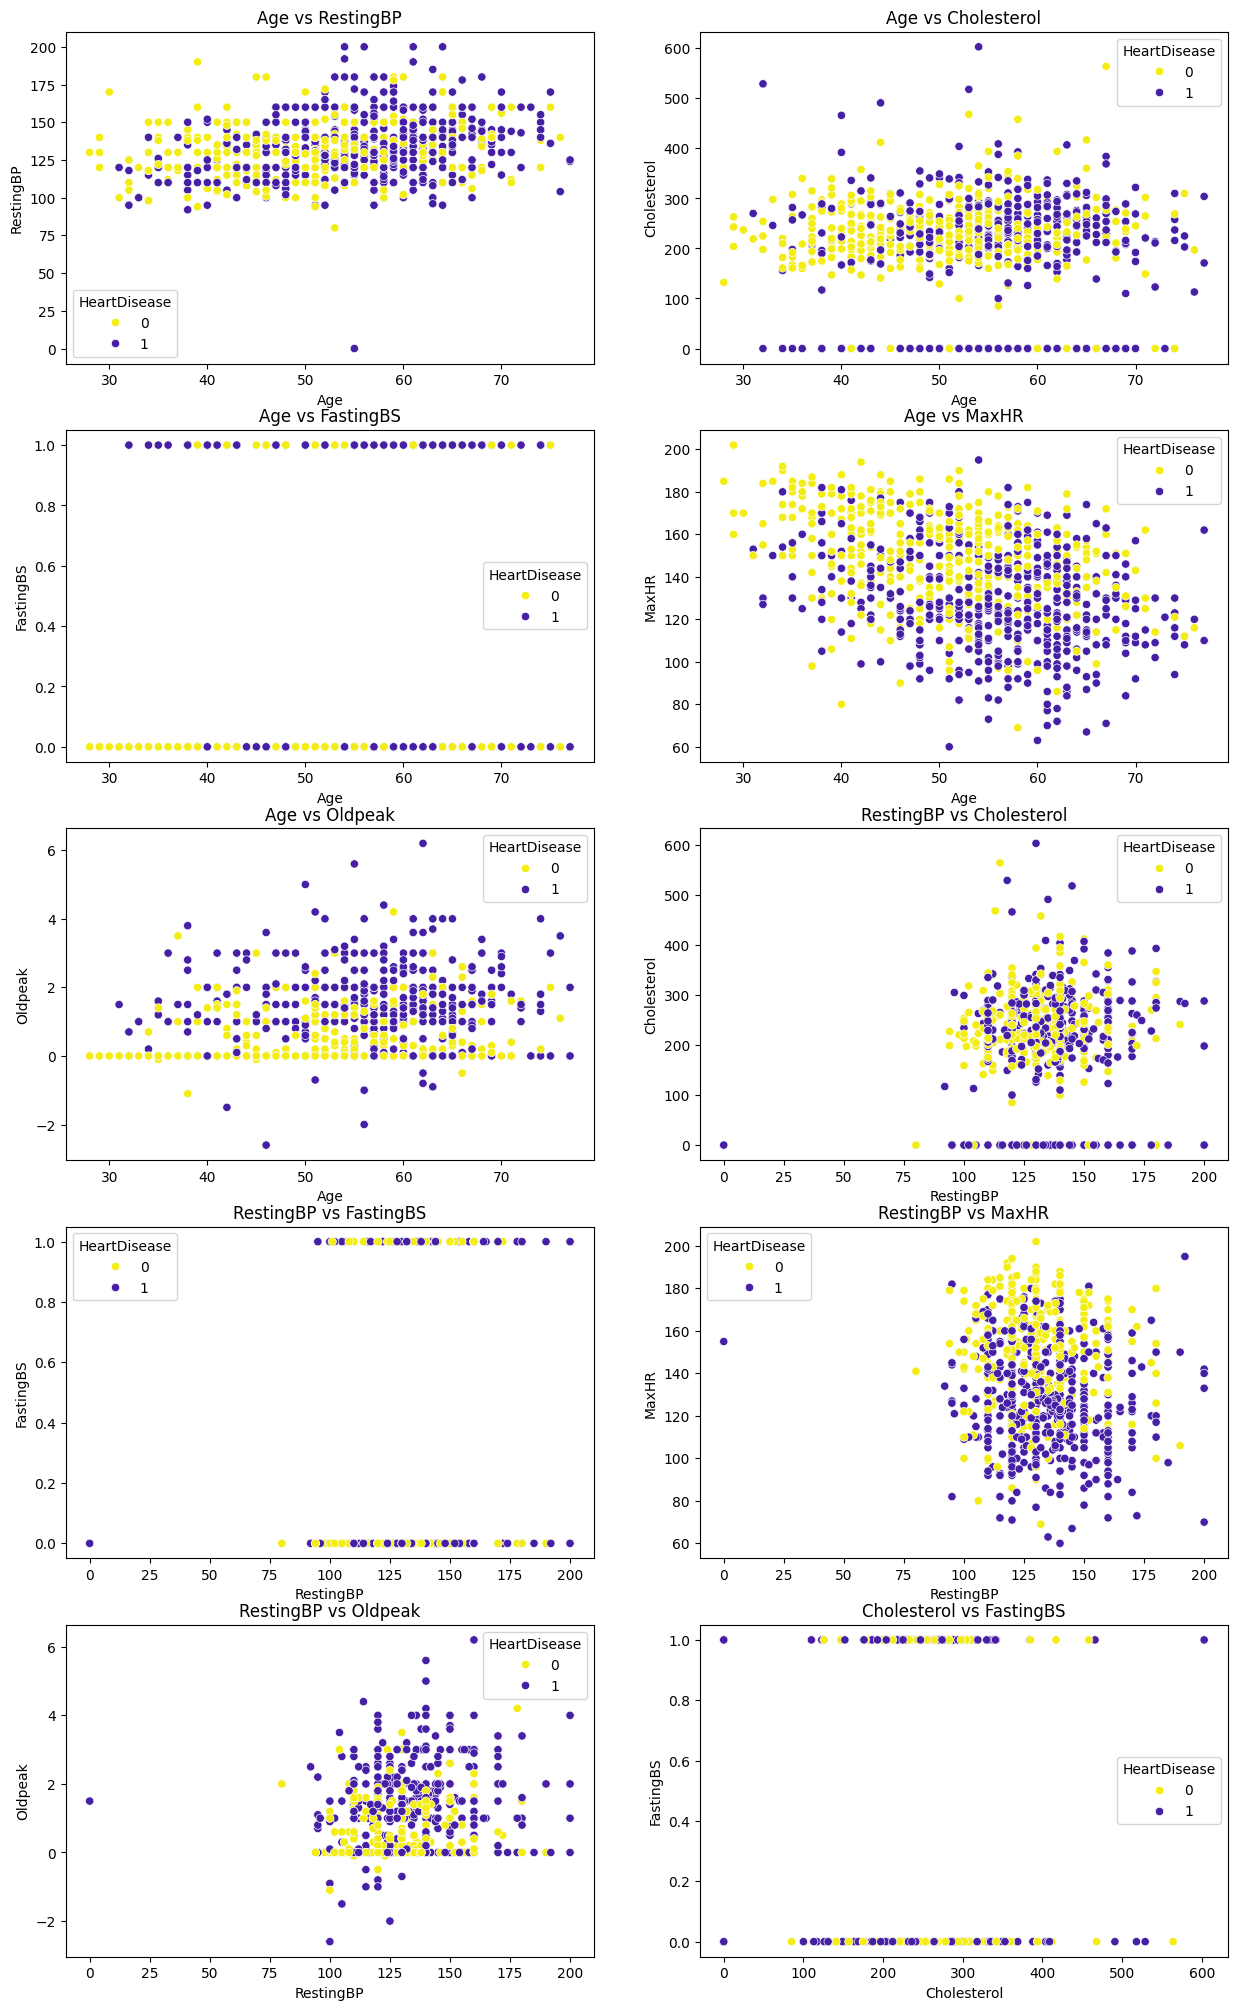

In [35]:
a = 0
fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (15,25))
for i in range(len(numeric_cols) - 1):
    for j in range(len(numeric_cols)-1):
        if i != j and j > i:
            a += 1
            plt.subplot(5,2,a)
            sns.scatterplot(x = numeric_cols[i],y = numeric_cols[j],data = data,hue = 'HeartDisease',palette = colors);
            title = numeric_cols[i] + ' vs ' + numeric_cols[j]
            plt.title(title)

<Axes: xlabel='Age'>

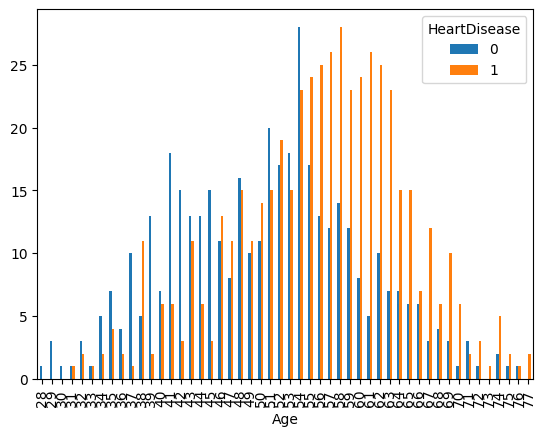

In [36]:
pd.crosstab(data.Age, data.HeartDisease).plot(kind='bar')

In [37]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1 = df.copy()

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,0,Normal,1.382928,N,0.295455,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,0,Normal,0.754157,N,0.409091,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,0,ST,-1.525138,N,0.295455,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,0,Normal,-1.132156,Y,0.465909,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,0,Normal,-0.581981,N,0.295455,Up,0


In [38]:
object_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Apply ordinal encoder
ordinal_encoder = OrdinalEncoder()
df1[object_cols] = ordinal_encoder.fit_transform(df1[object_cols])
df1

In [40]:
df1.ST_Slope.value_counts()

1.0    460
2.0    395
0.0     63
Name: ST_Slope, dtype: int64

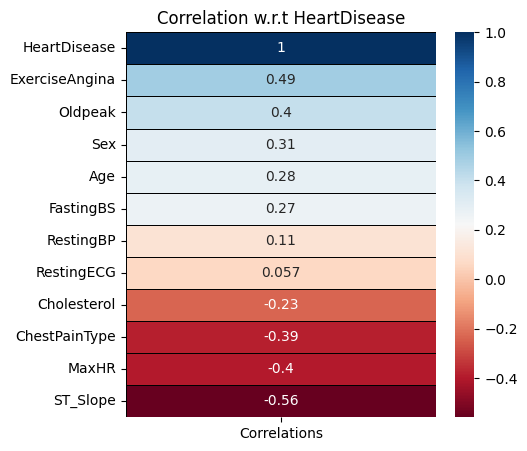

In [41]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'RdBu',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

In [42]:
# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [43]:
from sklearn.feature_selection import mutual_info_regression


X = df1.copy()
y = X.pop('HeartDisease')

mi_scores = make_mi_scores(X, y)


In [44]:
mi_scores

ST_Slope          0.236327
ChestPainType     0.152662
ExerciseAngina    0.125593
Oldpeak           0.115962
MaxHR             0.103672
Cholesterol       0.064797
FastingBS         0.050538
Age               0.045598
Sex               0.038507
RestingBP         0.004718
RestingECG        0.000000
Name: MI Scores, dtype: float64

In [45]:
X = X.drop(columns = ['RestingECG'])

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((642, 10), (276, 10), (642,), (276,))

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

In [48]:
a={'Model Name':[],'True Positive':[],'False Negative':[],'False Positive':[],'True Negative':[],'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[],'Specificity':[],'MCC':[],'ROC_AUC_Score':[],'Balanced Accuracy':[],'RMSE':[]}
result=pd.DataFrame(a)


Model Name:  LogisticRegression(max_iter=1000, penalty='l1', random_state=1,
                   solver='liblinear')
Confusion matrix : 
 [[141  23]
 [ 12 100]]
Outcome values : 
 141 23 12 100
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.86      0.89       164
           0       0.81      0.89      0.85       112

    accuracy                           0.87       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.87      0.87       276

0.12681159420289856
Accuracy : 87.32 %
Precision : 92.2 %
Recall : 86.0 %
F1 Score : 0.89
Specificity or True Negative Rate : 89.3 %
Balanced Accuracy : 87.6 %
MCC : MCC
roc_auc_score: 0.876


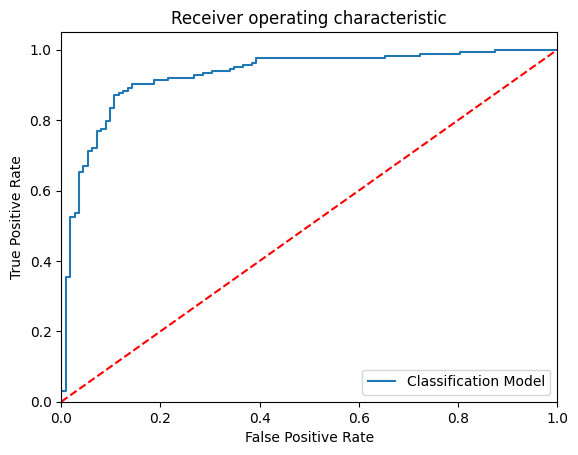

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier(max_depth=4, random_state=1000)
Confusion matrix : 
 [[142  22]
 [ 21  91]]
Outcome values : 
 142 22 21 91
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.87      0.87       164
           0       0.81      0.81      0.81       112

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276

0.15579710144927536
Accuracy : 84.42 %
Precision : 87.1 %
Recall : 86.6 %
F1 Score : 0.869
Specificity or True Negative Rate : 81.2 %
Balanced Accuracy : 83.9 %
MCC : MCC
roc_auc_score: 0.839


<ipython-input-49-80acaaa2a438>:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


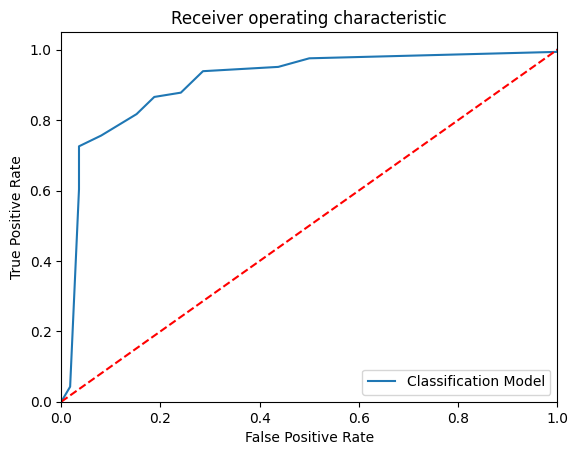

-----------------------------------------------------------------------------------------------------


<ipython-input-49-80acaaa2a438>:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


Model Name:  RandomForestClassifier(max_depth=4, max_leaf_nodes=20, min_samples_split=15,
                       n_estimators=1000, random_state=0)
Confusion matrix : 
 [[147  17]
 [ 15  97]]
Outcome values : 
 147 17 15 97
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.90      0.90       164
           0       0.85      0.87      0.86       112

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

0.11594202898550725
Accuracy : 88.41 %
Precision : 90.7 %
Recall : 89.6 %
F1 Score : 0.902
Specificity or True Negative Rate : 86.6 %
Balanced Accuracy : 88.1 %
MCC : MCC
roc_auc_score: 0.881


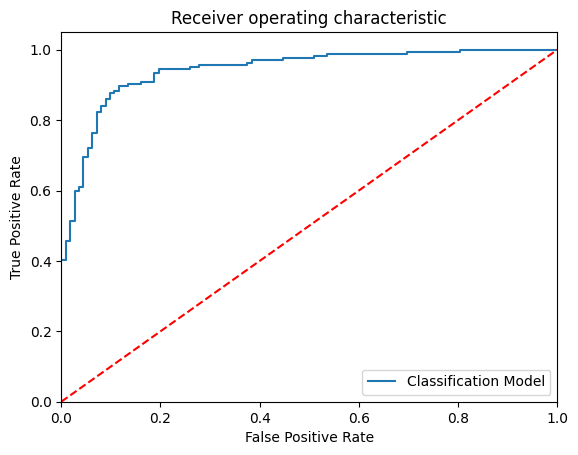

-----------------------------------------------------------------------------------------------------


<ipython-input-49-80acaaa2a438>:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[145  19]
 [ 11 101]]
Outcome values : 
 145 19 11 101
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.88      0.91       164
           0       0.84      0.90      0.87       112

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276

0.10869565217391304
Accuracy : 89.13 %
Precision : 92.9 %
Recall : 88.4 %
F1 Score : 0.906
Specificity or True Negative Rate : 90.2 %
Balanced Accuracy : 89.3 %
MCC : MCC
roc_auc_score: 0.893


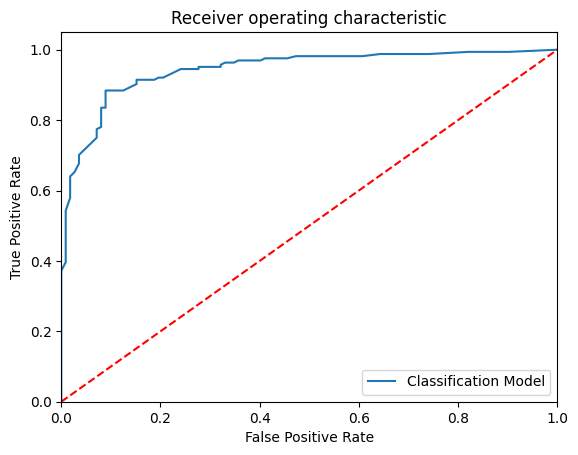

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)
Confusion matrix : 
 [[144  20]
 [ 17  95]]
Outcome values : 
 144 20 17 95
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.88      0.89       164
           0       0.83      0.85      0.84       112

    accuracy                           0.87       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276

0.13405797101449277
Accuracy : 86.59 %
Precision : 89.4 %
Recall : 87.8 %
F1 Score : 0.886
Specificity or True Negative Rate : 84.8 %
Balanced Accuracy : 86.3 %
MCC : MCC
roc_auc_score: 0.863


<ipython-input-49-80acaaa2a438>:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


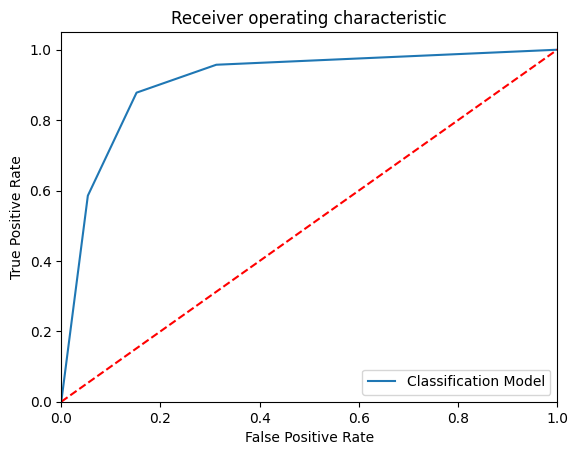

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[144  20]
 [ 16  96]]
Outcome values : 
 144 20 16 96
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.88      0.89       164
           0       0.83      0.86      0.84       112

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

0.13043478260869565
Accuracy : 86.96 %
Precision : 90.0 %
Recall : 87.8 %
F1 Score : 0.889
Specificity or True Negative Rate : 85.7 %
Balanced Accuracy : 86.7 %
MCC : MCC
roc_auc_score: 0.868


<ipython-input-49-80acaaa2a438>:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


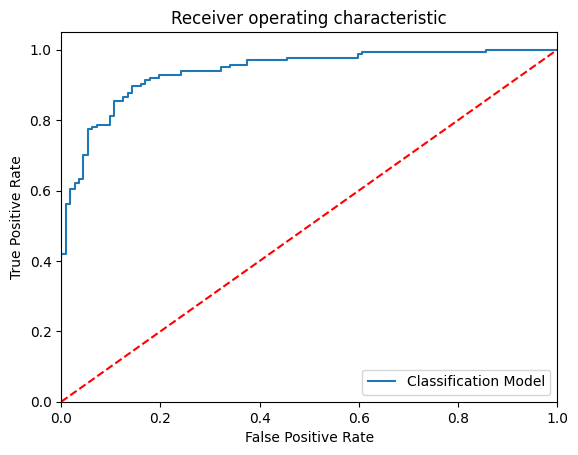

-----------------------------------------------------------------------------------------------------


<ipython-input-49-80acaaa2a438>:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


Model Name:  BaggingClassifier(base_estimator=None, n_estimators=100)
Confusion matrix : 
 [[138  26]
 [ 15  97]]
Outcome values : 
 138 26 15 97
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.84      0.87       164
           0       0.79      0.87      0.83       112

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.85      0.85       276

0.14855072463768115
Accuracy : 85.14 %
Precision : 90.2 %
Recall : 84.1 %
F1 Score : 0.871
Specificity or True Negative Rate : 86.6 %
Balanced Accuracy : 85.3 %
MCC : MCC
roc_auc_score: 0.854


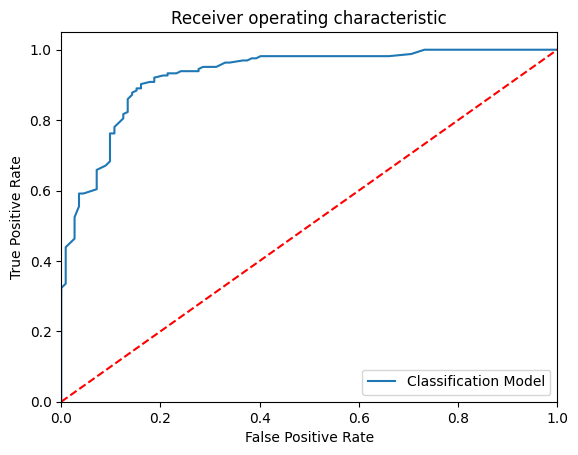

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[139  25]
 [ 13  99]]
Outcome values : 
 139 25 13 99
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.85      0.88       164
           0       0.80      0.88      0.84       112

    accuracy                           0.86       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.86      0.86       276

0.13768115942028986
Accuracy : 86.23 %
Precision : 91.4 %
Recall : 84.8 %
F1 Score : 0.88
Specificity or True Negative Rate : 88.4 %
Balanced Accuracy : 86.6 %
MCC : MCC
roc_auc_score: 0.866


<ipython-input-49-80acaaa2a438>:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


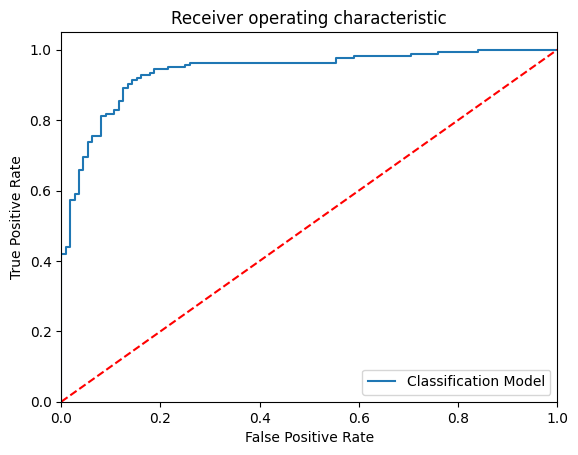

-----------------------------------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 344, number of negative: 298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535826 -> initscore=0.143548
[LightGBM] [Info] Start training from score 0.143548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

<ipython-input-49-80acaaa2a438>:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


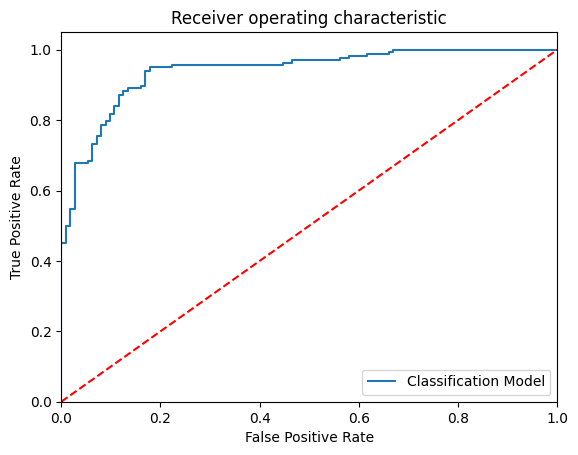

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[143  21]
 [ 14  98]]
Outcome values : 
 143 21 14 98
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.87      0.89       164
           0       0.82      0.88      0.85       112

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276

0.12681159420289856
Accuracy : 87.32 %
Precision : 91.1 %
Recall : 87.2 %
F1 Score : 0.891
Specificity or True Negative Rate : 87.5 %
Balanced Accuracy : 87.4 %
MCC : MCC
roc_auc_score: 0.873


<ipython-input-49-80acaaa2a438>:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


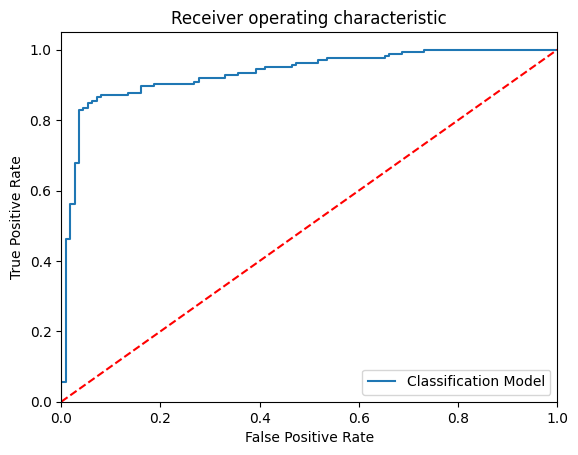

-----------------------------------------------------------------------------------------------------


<ipython-input-49-80acaaa2a438>:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


In [49]:
ModelLR = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
ModelDC = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
ModelRF = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=20, min_samples_split=15,max_depth = 4,random_state = 0)
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()


MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:

    # Fit the model

    models.fit(x_train, y_train)

    # Prediction

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)
    accuracy = accuracy_score(y_pred, y_test)
   # print('Model Score: ', score)
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    #accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model
    import math
    from math import sqrt

    from sklearn.metrics import mean_absolute_error
    val_mae = mean_absolute_error(y_test, y_pred)
#y_pred, y_test
# uncomment following line to see the validation_mae
    print(val_mae)

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', 'MCC')

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive' : tp,
               'False Negative' : fn,
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy,
               'RMSE':val_mae}
    result = result.append(new_row, ignore_index=True)


    # confusion matrix in sklearn

In [50]:
result

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,RMSE
0,"LogisticRegression(max_iter=1000, penalty='l1'...",141.0,23.0,12.0,100.0,0.873188,0.922,0.860,0.890,0.893,0.744,0.876307,0.876,0.126812
1,"DecisionTreeClassifier(max_depth=4, random_sta...",142.0,22.0,21.0,91.0,0.844203,0.871,0.866,0.869,0.812,0.677,0.839177,0.839,0.155797
2,"(DecisionTreeClassifier(max_depth=4, max_featu...",147.0,17.0,15.0,97.0,0.884058,0.907,0.896,0.902,0.866,0.760,0.881206,0.881,0.115942
3,"(ExtraTreeClassifier(random_state=671906827), ...",145.0,19.0,11.0,101.0,0.891304,0.929,0.884,0.906,0.902,0.779,0.892966,0.893,0.108696
4,"KNeighborsClassifier(leaf_size=1, n_neighbors=...",144.0,20.0,17.0,95.0,0.865942,0.894,0.878,0.886,0.848,0.723,0.863132,0.863,0.134058
5,SVC(probability=True),144.0,20.0,16.0,96.0,0.869565,0.900,0.878,0.889,0.857,0.731,0.867596,0.867,0.130435
6,(DecisionTreeClassifier(random_state=109006674...,138.0,26.0,15.0,97.0,0.851449,0.902,0.841,0.871,0.866,0.699,0.853767,0.853,0.148551
7,([DecisionTreeRegressor(criterion='friedman_ms...,139.0,25.0,13.0,99.0,0.862319,0.914,0.848,0.880,0.884,0.722,0.865745,0.866,0.137681
8,LGBMClassifier(),144.0,20.0,14.0,98.0,0.876812,0.911,0.878,0.894,0.875,0.747,0.876524,0.876,0.123188
9,GaussianNB(),143.0,21.0,14.0,98.0,0.873188,0.911,0.872,0.891,0.875,0.741,0.873476,0.874,0.126812


In [51]:
top3=result.sort_values(by=['F1 Score','Accuracy','True Positive','True Negative'],ascending=False).reset_index(drop=True).head(3)
top3

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,RMSE
0,"(ExtraTreeClassifier(random_state=671906827), ...",145.0,19.0,11.0,101.0,0.891304,0.929,0.884,0.906,0.902,0.779,0.892966,0.893,0.108696
1,"(DecisionTreeClassifier(max_depth=4, max_featu...",147.0,17.0,15.0,97.0,0.884058,0.907,0.896,0.902,0.866,0.760,0.881206,0.881,0.115942
2,LGBMClassifier(),144.0,20.0,14.0,98.0,0.876812,0.911,0.878,0.894,0.875,0.747,0.876524,0.876,0.123188


In [55]:
# THE BEST MODEL FROM ABOVE IS RANDOM FOREST CLASSIFIER AND WOULD BE USED FOR DEPLOYMENT

In [56]:
ModelRF.fit(x_train,y_train)
y_pred=ModelRF.predict(x_test)
y_pred.shape

(276,)

In [57]:
out={'HeartFailure_Actual':y_test,'HeartFailure_Pred':y_pred}
out=pd.DataFrame(out)
df_bk = df.copy()
df_bk=df_bk.merge(out,left_index=True,right_index=True)
df_bk.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartFailure_Actual,HeartFailure_Pred
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0,0,0
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0,0,0
60,49,M,ATA,100,253,0,Normal,174,N,0.0,Up,0,0,0
227,38,M,ASY,92,117,0,Normal,134,Y,2.5,Flat,1,1,1
749,54,M,NAP,150,232,0,LVH,165,N,1.6,Up,0,0,0
79,49,M,ASY,130,206,0,Normal,170,N,0.0,Flat,1,1,1
467,63,F,ATA,132,0,0,Normal,130,N,0.1,Up,0,0,0
133,56,M,ASY,150,230,0,ST,124,Y,1.5,Flat,1,1,1
481,69,M,NAP,140,0,1,ST,118,N,2.5,Down,1,1,1
525,45,M,NAP,130,236,0,Normal,144,N,0.1,Up,0,0,0


##   <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> OUTPUT OF THE PREDICTED VALUES :</div>


In [58]:
df_bk

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartFailure_Actual,HeartFailure_Pred
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0,0,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0,0,0
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0,0,0
23,44,M,ATA,150,288,0,Normal,150,Y,3.0,Flat,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,44,M,ASY,120,169,0,Normal,144,Y,2.8,Down,1,1,1
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1,1,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1,1,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,1,1


In [59]:
import pickle

In [60]:
filename = 'Random_Forest.sav'
pickle.dump(ModelRF, open(filename, 'wb'))